### CONTENTS
#### 1 Importing libraries
#### 2 Importing data 
#### 3 Data wrangling
#### 4 KNN model

# 1 Importing libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# 2 Importing data

In [38]:
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'

In [40]:
climate = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'weather_scaled.pkl'))

In [42]:
# Import the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [44]:
pleasantweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

# 3 Data wrangling

In [47]:
climate.columns

Index(['id', 'DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=171)

In [49]:
# Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

# 4 KNN Model

In [52]:
# Define X and y datasets
# Drop the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [54]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [56]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [60]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

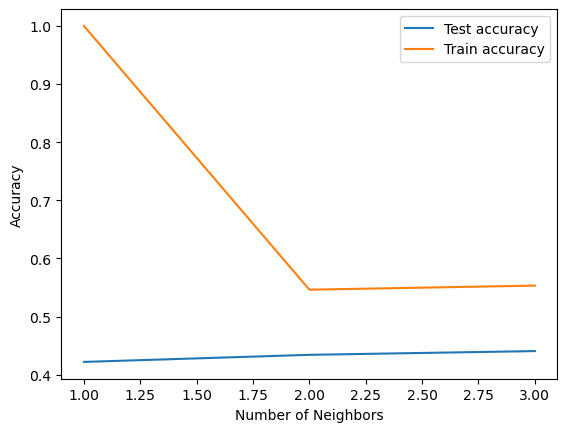

In [62]:
# Plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\elena\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


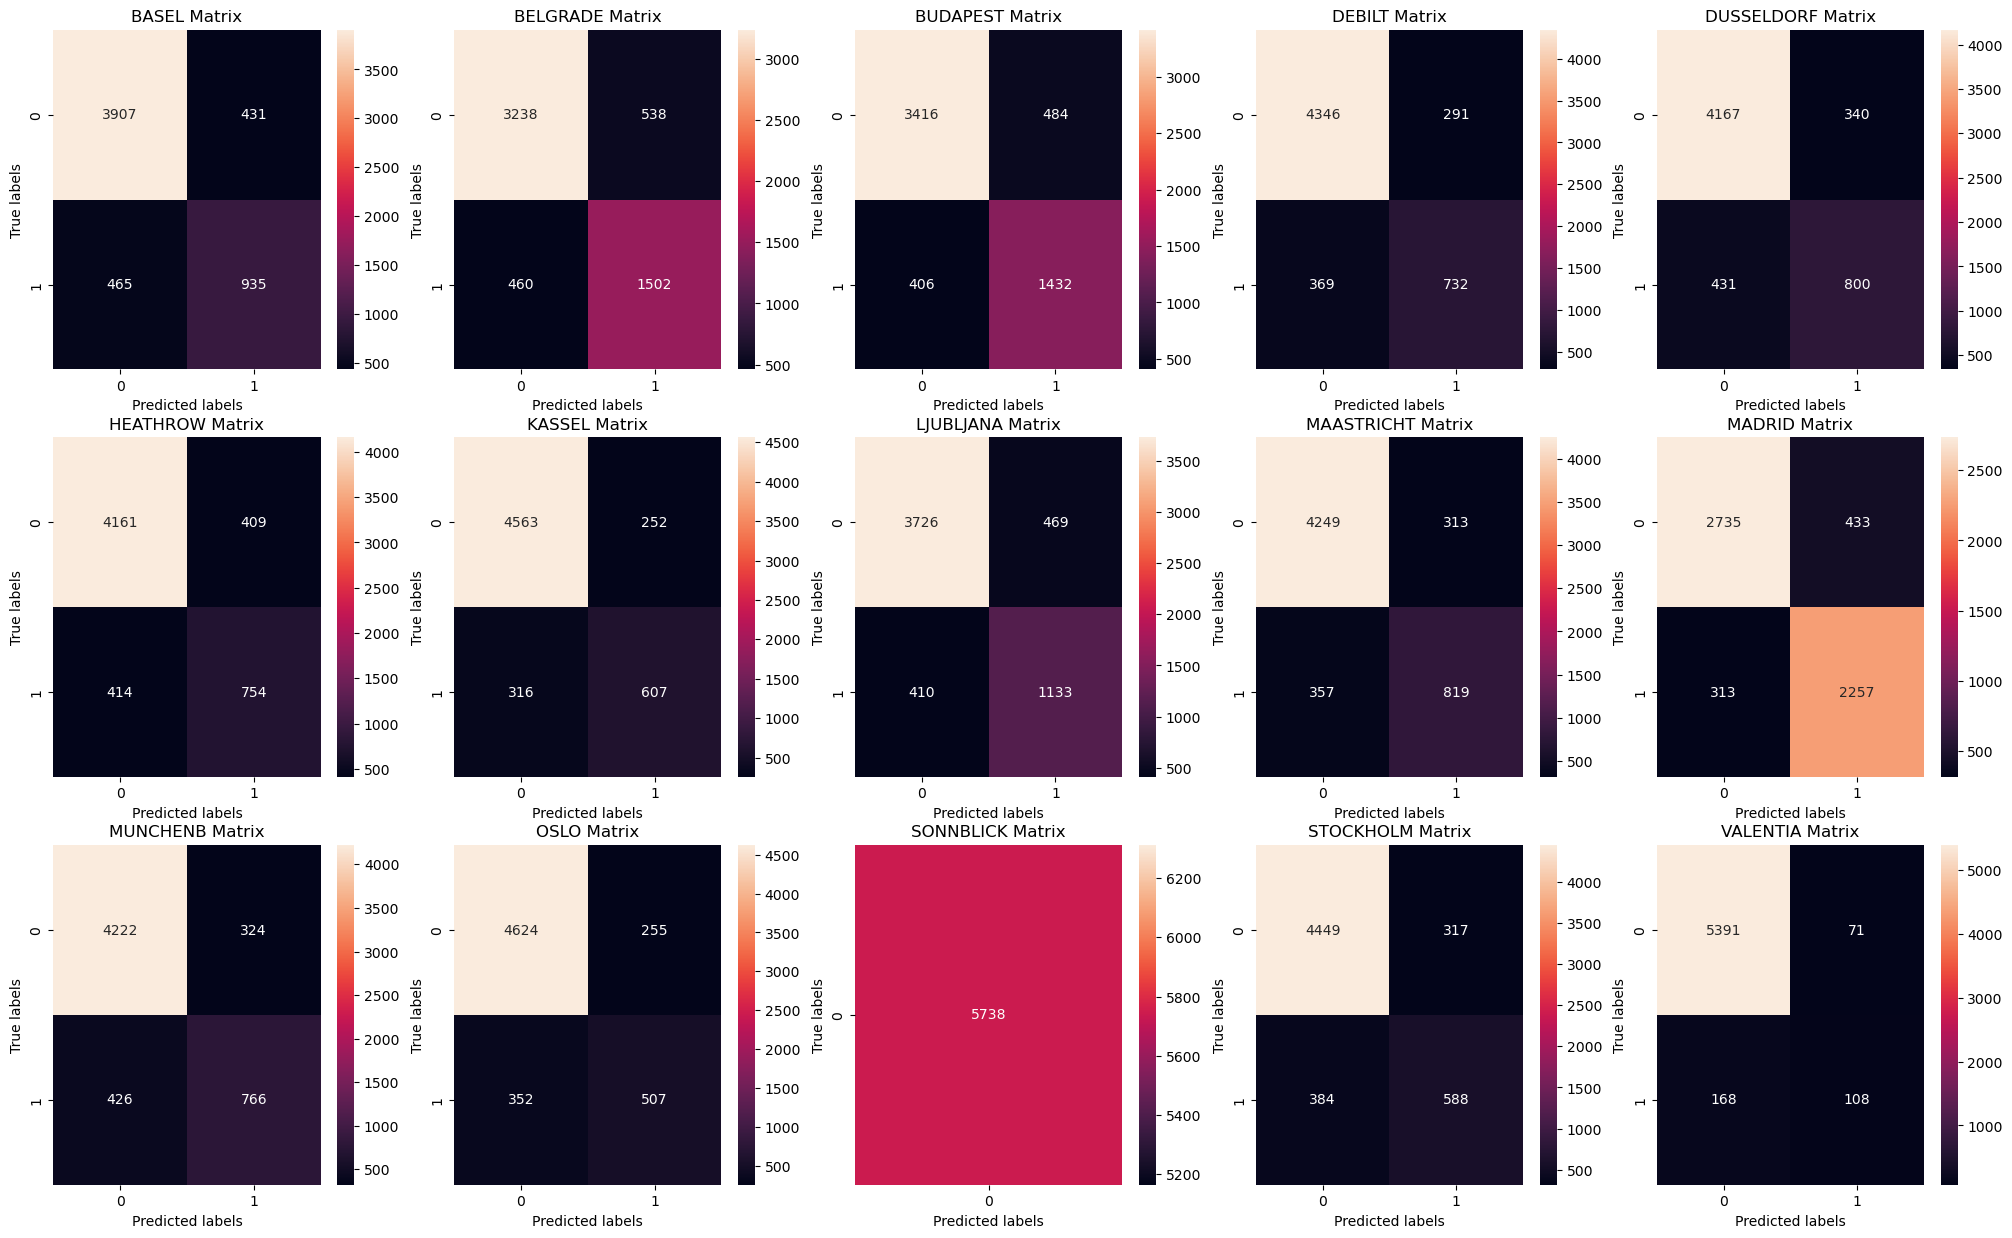

In [64]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        if count >= len(locations):
            break
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1


There is only one class of values for Sonnblick ('0' instead of '0' and '1'), which resulted in the warning appearing.

In [67]:
# Correcting the code, so there is no error message

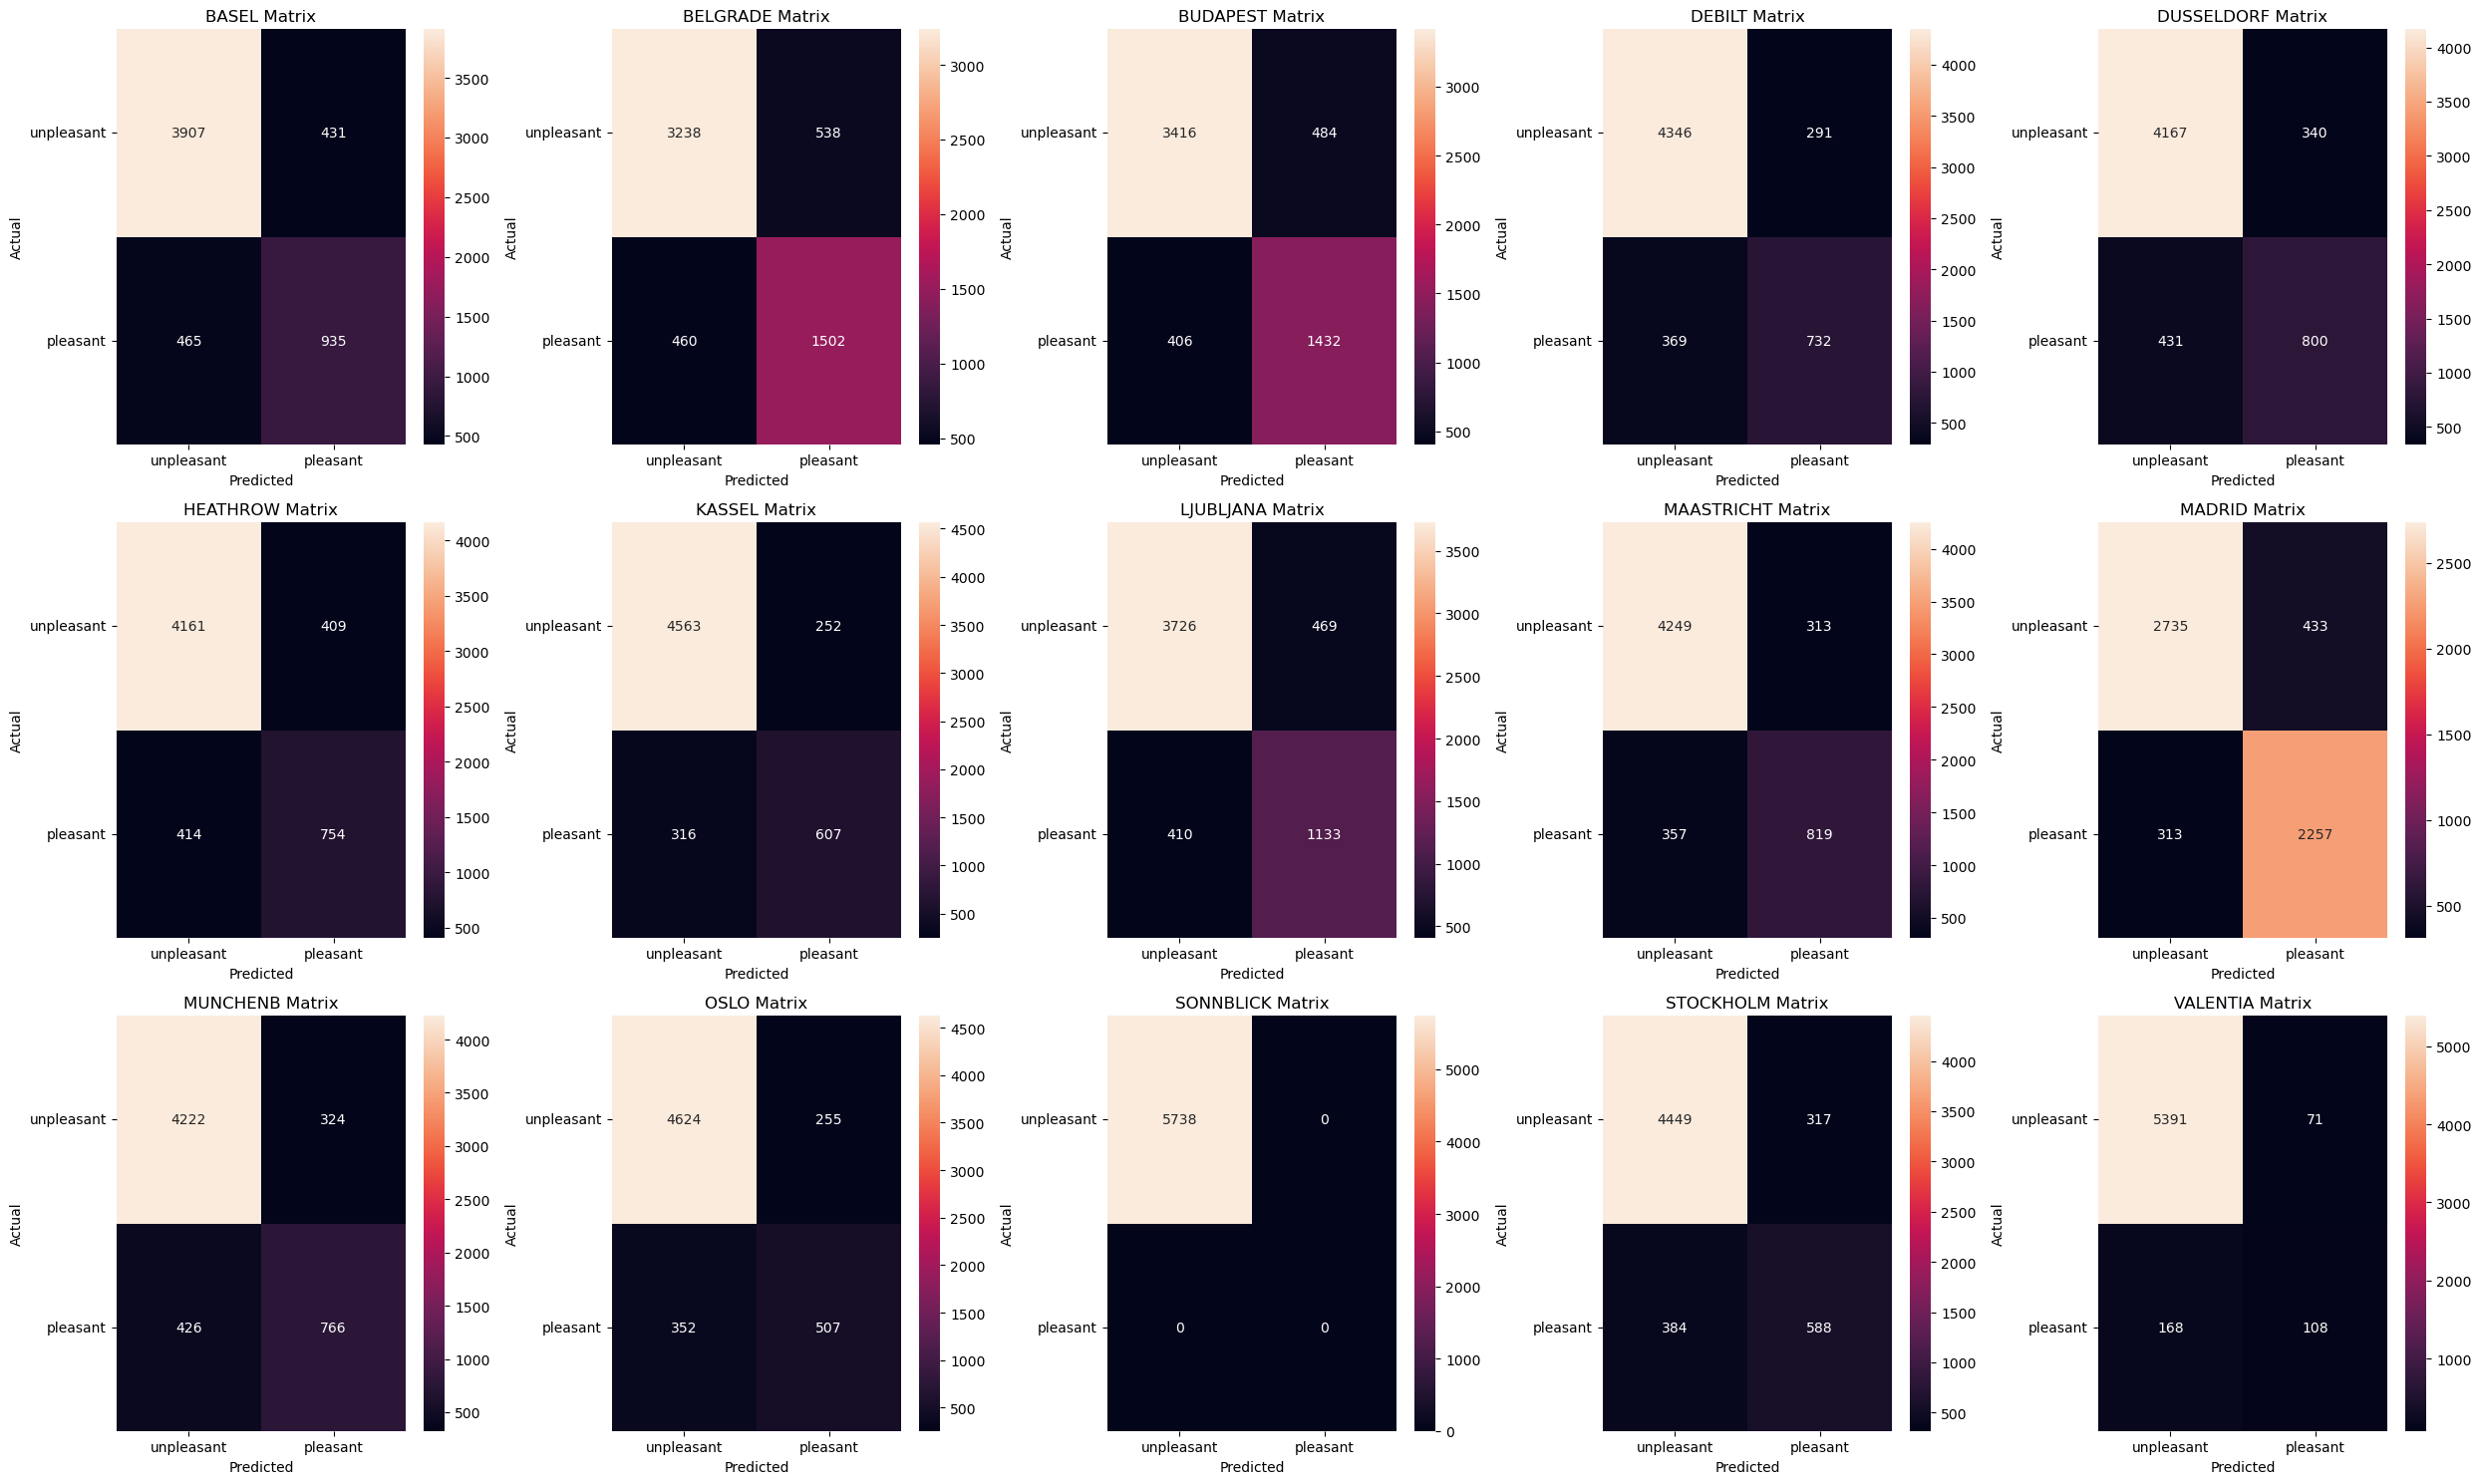

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['unpleasant', 'pleasant']  # Label 0 = unpleasant, 1 = pleasant
count = 0

# Adjust subplot grid size based on number of locations
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25, 15))

for i in range(rows):
    for j in range(cols):
        if count >= len(locations):
            ax[i, j].axis('off')  # Hide unused subplot
            continue

        name = locations[count]
        true_vals = y_test.loc[:, name + key]
        pred_vals = y_pred[:, count]

        cm = confusion_matrix(true_vals, pred_vals, labels=[0, 1])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        ax[i, j].set_xlabel('Predicted')
        ax[i, j].set_ylabel('Actual')
        ax[i, j].set_title(f"{name} Matrix")
        ax[i, j].set_xticklabels(labels)
        ax[i, j].set_yticklabels(labels, rotation=0)

        count += 1

plt.tight_layout()
plt.show()


Corrected the code a bit using Chart GPT and produced the confusion matrix with results for Sonnblick shown properly.

In [72]:
# Getting classifiction report to examine Precision, Recall and F1 values

In [76]:
from sklearn.metrics import classification_report
import pandas as pd

key = "_pleasant_weather"
report_data = []

for count, name in enumerate(locations):
    true_vals = y_test[name + key]
    pred_vals = y_pred[:, count]

    try:
        report_dict = classification_report(
            true_vals,
            pred_vals,
            labels=[0, 1],  # Ensures consistent class reporting
            target_names=["Unpleasant", "Pleasant"],
            output_dict=True,
            zero_division=0  # Avoids errors if precision/recall is undefined
        )

        report_data.append({
            "Station": name,
            "Precision (Unpleasant)": report_dict["Unpleasant"]["precision"],
            "Recall (Unpleasant)": report_dict["Unpleasant"]["recall"],
            "F1-Score (Unpleasant)": report_dict["Unpleasant"]["f1-score"],
            "Precision (Pleasant)": report_dict["Pleasant"]["precision"],
            "Recall (Pleasant)": report_dict["Pleasant"]["recall"],
            "F1-Score (Pleasant)": report_dict["Pleasant"]["f1-score"],
            "Accuracy": report_dict["accuracy"]
        })

    except Exception as e:
        print(f"Skipped {name} due to error: {e}")

# Create DataFrame
report_df = pd.DataFrame(report_data)
display(report_df)


Station  Precision (Unpleasant)  Recall (Unpleasant)  \
0        BASEL                0.893641             0.900645   
1     BELGRADE                0.875608             0.857521   
2     BUDAPEST                0.893773             0.875897   
3       DEBILT                0.921739             0.937244   
4   DUSSELDORF                0.906264             0.924562   
5     HEATHROW                0.909508             0.910503   
6       KASSEL                0.935233             0.947664   
7    LJUBLJANA                0.900870             0.888200   
8   MAASTRICHT                0.922492             0.931390   
9       MADRID                0.897310             0.863321   
10    MUNCHENB                0.908348             0.928729   
11        OSLO                0.929260             0.947735   
12   SONNBLICK                1.000000             1.000000   
13   STOCKHOLM                0.920546             0.933487   
14    VALENTIA                0.969779             0.987001   

    F1-Score (Unpleasant)  Precision (Pleasant)  Recall (Pleasant)  \
0                0.897130              0.684480           0.667857   
1                0.866470              0.736275           0.765545   
2                0.884745              0.747390           0.779108   
3                0.929427              0.715543           0.664850   
4                0.915321              0.701754           0.649878   
5                0.910005              0.648323           0.645548   
6                0.941407              0.706636           0.657638   
7                0.894490              0.707241           0.734284   
8                0.926920              0.723498           0.696429   
9                0.879987              0.839033           0.878210   
10               0.918425              0.702752           0.642617   
11               0.938407              0.665354           0.590221   
12               1.000000              0.000000           0.000000   
13               0.926972              0.649724           0.604938   
14               0.978314              0.603352           0.391304   

    F1-Score (Pleasant)  Accuracy  
0              0.676067  0.843848  
1              0.750625  0.826072  
2              0.762920  0.844894  
3              0.689266  0.884977  
4              0.674821  0.865633  
5              0.646933  0.856570  
6              0.681257  0.901011  
7              0.720509  0.846811  
8              0.709705  0.883235  
9              0.858175  0.869990  
10             0.671341  0.869292  
11             0.625540  0.894214  
12             0.000000  1.000000  
13             0.626532  0.877832  
14             0.474725  0.958348

In [72]:
# Export classification report
report_df.to_csv(os.path.join(path, '04 Analysis','Reports', 'classification_table.csv'), index=False)